<a href="https://colab.research.google.com/github/KyungRyeolBaek/study/blob/main/ai03_sc12x_%EB%B0%B1%EA%B2%BD%EB%A0%AC_2%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# SC12x

## Statistical Analysis

## 개요

여러분은 코스 수료를 마치고 CodeStates에 DS CA (Coaching  Assistant)로 합류했습니다.

여러분에게 주어진 메인 태스크는 세션 및 수강생 핸들링이지만. 

시간을 짜내어 사이드 프로젝트를 하고 싶어졌습니다.

AIB 팀원들과의 커피타임을 통해 수강생 데이터를 하나 받을 수 있었습니다.

> 기수별 학생들 성취도 데이터인데, 어떤 의미가 있는지 확인해주세요.

### Data Description

- F1 : `N`, `D`
- F2 : `Y`, `N`
- F3 : `A`, `B`, `C`, `D` (기수)
- F4 : Continuous
- F5 : Continuous
- F6 : `A` ~ `H`
- F7 : Continuous
- F8 : `X`, `Y`, `Z`
- F9 : `Y`, `N`

## 1. 다음 링크를 참조하여 데이터를 불러오세요. 

<https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv>

이후 간단한 전처리를 하세요.


In [76]:
import pandas as pd

df = pd.read_csv("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc12x/csdata.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   F1          200 non-null    object 
 2   F2          191 non-null    object 
 3   F3          200 non-null    object 
 4   F4          200 non-null    float64
 5   F5          170 non-null    float64
 6   F6          200 non-null    object 
 7   F7          197 non-null    float64
 8   F8          200 non-null    object 
 9   F9          200 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 15.8+ KB


In [77]:
# F2 결측치 제거
# F5, F7 결측치 평균값으로 보간
df['F5'].fillna(df['F5'].mean(), inplace = True)
df['F7'].fillna(round(df['F7'].mean(), 0), inplace = True)
df.dropna(inplace = True)

df.isnull().sum()

Unnamed: 0    0
F1            0
F2            0
F3            0
F4            0
F5            0
F6            0
F7            0
F8            0
F9            0
dtype: int64

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  191 non-null    int64  
 1   F1          191 non-null    object 
 2   F2          191 non-null    object 
 3   F3          191 non-null    object 
 4   F4          191 non-null    float64
 5   F5          191 non-null    float64
 6   F6          191 non-null    object 
 7   F7          191 non-null    float64
 8   F8          191 non-null    object 
 9   F9          191 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 16.4+ KB


In [79]:
for i in df:
  print(i, df[i].unique())

Unnamed: 0 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  86  87  88  89  90  91  92  93
  94  95  97  98  99 100 101 102 103 104 105 106 107 108 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 141 142 144 145 146 147 148 149 150 151
 152 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 192 193 194 195 196 197 198 199 200]
F1 ['N' 'D']
F2 ['N' 'Y']
F3 ['A' 'a' 'B' 'b' 'C' 'c' 'D' 'd']
F4 [2.23954182 1.60889961 2.5444093  0.78285689 1.53272053 0.81871588
 1.06524315 2.28529887 2.65427391 1.2804742  2.0041468  0.67579729
 0.09099458 2

In [80]:
# F3 소문자 -> 대문자
df['F3'] = df['F3'].str.upper()
df['F3'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [81]:
# F2 결측치 제거
# F3 소문자 -> 대문자로 변환 
# F5 결측치 평균값으로 보간
# F7 결측치 평균값 자연수로 반올림으로 대체
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 199
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  191 non-null    int64  
 1   F1          191 non-null    object 
 2   F2          191 non-null    object 
 3   F3          191 non-null    object 
 4   F4          191 non-null    float64
 5   F5          191 non-null    float64
 6   F6          191 non-null    object 
 7   F7          191 non-null    float64
 8   F8          191 non-null    object 
 9   F9          191 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 16.4+ KB


## 2. **F3**에 따라서 다른 Feature들이 어떤 경향을 나타내는지 해석해보세요.

- categorical feature의 경우 crosstab을 사용하여 [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)과 chi-square를 시도해 볼 수 있습니다.

- continuous feature의 경우 여러 시각화와 t-test를 할 수 있을 겁니다.

- 이를 바탕으로 **가장 유의미한** 그리고 **가장 무의미한** feature를 찾아보세요.

여기서 여러분들의 목표는 

`F3`에 따라서 다른 feature들이 영향이 있는지 없는지를 알아보는 

**가설검정** 입니다.

따라서 데이터 탐색 및 시각화 작업에 너무 많은 시간을 쏟지 마세요. 이것은 사이드 프로젝트 입니다.

In [82]:
df.head(5)

,Unnamed: 0,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
1,2,D,N,A,1.608900,0.133612,H,3.0,X,Y
2,3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
3,4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
4,5,N,N,A,1.532721,0.283534,E,4.0,Z,Y


In [83]:
# 비교 대상 : F3
# categorical feature : F1, F2, F6, F8, F9 -> crosstab, chi-square
# 귀무가설 : F3과 비교한 feature는 서로 유의미한 차이가 나지 않는다.  (채택 기준 : p-value > 0.05)
# 대안가설 : F3과 비교한 feature는 서로 유의미한 차이가 난다.         (채택 기준 : p-value < 0.05)
# countinuous feature : F4, F5, F7 -> t-test
# 귀무가설 : F3과 비교한 feature는 서로 유의미한 차이가 나지 않는다.  (채택 기준 : p-value > 0.05)
# 대안가설 : F3과 비교한 feature는 서로 유의미한 차이가 난다.         (채택 기준 : p-value < 0.05)
from scipy.stats import chi2_contingency

In [84]:
# F3, F1 crosstab, contingency tables
display(pd.crosstab(df['F1'], df['F3'], margins_name = 'sum', margins = sum))

# chi-square
chi_1 = chi2_contingency(pd.crosstab(df['F1'], df['F3'], margins_name = 'sum', margins = sum))  # p-value = 0.989
print('\nChi2 Statistic = {}, p-value = {}'.format(round(chi_1[0], 3), round(chi_1[1], 3)))     # 귀무가설 채택

F3,A,B,C,D,sum
F1,,,,,
D,6,9,10,10,35
N,43,38,37,38,156
sum,49,47,47,48,191



Chi2 Statistic = 1.707, p-value = 0.989


In [85]:
# F3, F2 crosstab, contingency tables
display(pd.crosstab(df['F2'], df['F3'], margins_name = 'sum', margins = sum))

# chi-square
chi_2 = chi2_contingency(pd.crosstab(df['F2'], df['F3'], margins_name = 'sum', margins = sum))  # p-value = 0.939
print('\nChi2 Statistic = {}, p-value = {}'.format(round(chi_2[0], 3), round(chi_2[1], 3)))     # 귀무가설 채택

F3,A,B,C,D,sum
F2,,,,,
N,45,44,42,47,178
Y,4,3,5,1,13
sum,49,47,47,48,191



Chi2 Statistic = 2.932, p-value = 0.939


In [86]:
# F3, F6 crosstab, contingency tables
display(pd.crosstab(df['F6'], df['F3'], margins_name = 'sum', margins = sum))

# chi-square
chi_6 = chi2_contingency(pd.crosstab(df['F6'], df['F3'], margins_name = 'sum', margins = sum))  # p-value = 0.985
print('\nChi2 Statistic = {}, p-value = {}'.format(round(chi_6[0], 3), round(chi_6[1], 3)))     # 귀무가설 채택

F3,A,B,C,D,sum
F6,,,,,
B,0,1,0,0,1
C,1,1,1,2,5
D,2,2,1,1,6
E,5,4,5,4,18
F,9,15,8,5,37
G,9,10,13,12,44
H,23,14,19,24,80
sum,49,47,47,48,191



Chi2 Statistic = 14.235, p-value = 0.985


In [87]:
# F3, F8 crosstab, contingency tables
display(pd.crosstab(df['F8'], df['F3'], margins_name = 'sum', margins = sum))

# chi-square
chi_8 = chi2_contingency(pd.crosstab(df['F8'], df['F3'], margins_name = 'sum', margins = sum))  # p-value = 0.944
print('\nChi2 Statistic = {}, p-value = {}'.format(round(chi_8[0], 3), round(chi_8[1], 3)))     # 귀무가설 채택

F3,A,B,C,D,sum
F8,,,,,
X,9,5,13,12,39
Y,26,28,21,22,97
Z,14,14,13,14,55
sum,49,47,47,48,191



Chi2 Statistic = 5.385, p-value = 0.944


In [88]:
# F3, F9 crosstab, contingency tables
display(pd.crosstab(df['F9'], df['F3'], margins_name = 'sum', margins = sum))

# chi-square
chi_9 = chi2_contingency(pd.crosstab(df['F9'], df['F3'], margins_name = 'sum', margins = sum))  # p-value = 1.0
print('\nChi2 Statistic = {}, p-value = {}'.format(round(chi_9[0], 3), round(chi_9[1], 3)))     # 귀무가설 채택

F3,A,B,C,D,sum
F9,,,,,
N,25,26,26,28,105
Y,24,21,21,20,86
sum,49,47,47,48,191



Chi2 Statistic = 0.533, p-value = 1.0


In [89]:
# categrical feature 들 중에서 
# F3 - F1 p-value = 0.989
# F3 - F2 p-value = 0.939   -> 그나마 가장 유의미한 feature
# F3 - F6 p-value = 0.985
# F3 - F8 p-value = 0.944
# F3 - F9 p-value = 1.0     -> 가장 무의미한 feature

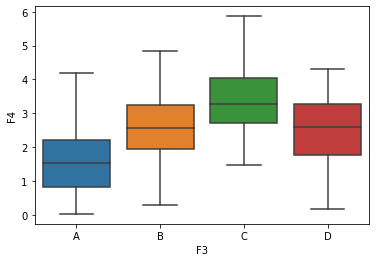

In [90]:
import seaborn as sns
# countinuous feature : F4, F5, F7 시각화

sns.boxplot(x = 'F3', y = 'F4', data = df);

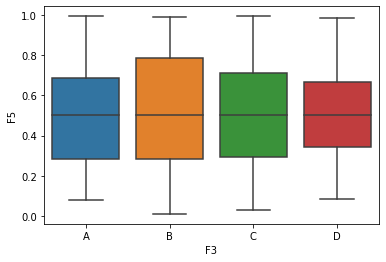

In [91]:
sns.boxplot(x = 'F3', y = 'F5', data = df);

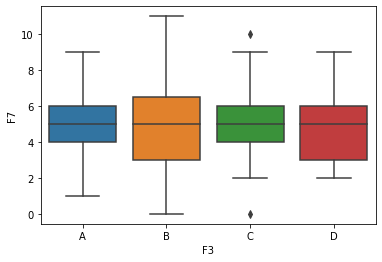

In [92]:
sns.boxplot(x = 'F3', y = 'F7', data = df);

In [93]:
df_A = df[df['F3'] == 'A'] 
df_B = df[df['F3'] == 'B']
df_C = df[df['F3'] == 'C']
df_D = df[df['F3'] == 'D']

import scipy.stats as st
# F3, F4 t-test
print('F3, F4 t-test')
print('p-value =', round(st.ttest_ind(df_A['F4'], df_B['F4'])[1], 4))
print('p-value =', round(st.ttest_ind(df_C['F4'], df_D['F4'])[1], 4))
print('p-value =', round(st.ttest_ind(df_B['F4'], df_C['F4'])[1], 4))
print('p-value =', round(st.ttest_ind(df_A['F4'], df_D['F4'])[1], 4))

F3, F4 t-test
p-value = 0.0
p-value = 0.0001
p-value = 0.0001
p-value = 0.0001


In [94]:
# F3, F5 t-test
print('F3, F5 t-test')
print('p-value =', round(st.ttest_ind(df_A['F5'], df_B['F5'])[1], 4))
print('p-value =', round(st.ttest_ind(df_C['F5'], df_D['F5'])[1], 4))
print('p-value =', round(st.ttest_ind(df_B['F5'], df_C['F5'])[1], 4))
print('p-value =', round(st.ttest_ind(df_A['F5'], df_D['F5'])[1], 4))

F3, F5 t-test
p-value = 0.7923
p-value = 0.6339
p-value = 0.6862
p-value = 0.7434


In [95]:
# F3, F7 t-test
print('F3, F7 t-test')
print('p-value =', round(st.ttest_ind(df_A['F7'], df_B['F7'])[1], 4))
print('p-value =', round(st.ttest_ind(df_C['F7'], df_D['F7'])[1], 4))
print('p-value =', round(st.ttest_ind(df_B['F7'], df_C['F7'])[1], 4))
print('p-value =', round(st.ttest_ind(df_A['F7'], df_D['F7'])[1], 4))

F3, F7 t-test
p-value = 0.6287
p-value = 0.9546
p-value = 0.7656
p-value = 0.8771


In [96]:
# F3, F4 ANOVA one-way 테스트
print('F3, F4 ANOVA one-way 테스트')
print('p-value =', round(st.f_oneway(df_A['F4'], df_B['F4'], df_C['F4'], df_D['F4'])[1], 5))    # 가장 유의미한 feature

F3, F4 ANOVA one-way 테스트
p-value = 0.0


In [97]:
# F3, F5 ANOVA one-way 테스트
print('F3, F5 ANOVA one-way 테스트')
print('p-value =', round(st.f_oneway(df_A['F5'], df_B['F5'], df_C['F5'], df_D['F5'])[1], 5))

F3, F5 ANOVA one-way 테스트
p-value = 0.96082


In [98]:
# F3, F7 ANOVA one-way 테스트
print('F3, F7 ANOVA one-way 테스트')
print('p-value =', round(st.f_oneway(df_A['F7'], df_B['F7'], df_C['F7'], df_D['F7'])[1], 5))    # 가장 무의미한 feature

F3, F7 ANOVA one-way 테스트
p-value = 0.96403


In [99]:
# categrical feature 들 중에서 
# F3 - F1 p-value = 0.989
# F3 - F2 p-value = 0.939   -> 그나마 가장 유의미한 feature
# F3 - F6 p-value = 0.985
# F3 - F8 p-value = 0.944
# F3 - F9 p-value = 1.0     -> 가장 무의미한 feature

# countinuous feature 들 중에서
# F3, F4 p-value = 0.0      -> 가장 유의미한 feature
# F3, F5 p-value = 0.96082
# F3, F7 p-value = 0.96403  -> 가장 무의미한 feature

## 3. 분석한 내용들을 설명하는 리포트를 작성해보세요. 

분석의 끝은 결국 설명입니다.

통계 분석에 대한 이해도가 적은 다른 크루들이 이해 할 수 있도록 

분석한 내용들을 설명하는 리포트를 작성해보세요. 

필요한 경우 코드 / 텍스트 내용을 더 추가해도 좋습니다.

In [100]:
'''
* 데이터 전처리 과정 :
데이터 안의 F2, F5, F7에 결측치가 확인되었습니다.
F2 결측치가 있는 데이터 행은 제거하고,
F5의 결측치가 있는 곳은 F5 평균값으로 보간 하고,
F7의 결측치가 있는 곳은 F7 평균값의 정수형태로 보간 했습니다.
그리고 F3의 값에 소문자와 대문자가 혼합되어 있어서
F3의 소문자들을 대문자로 변경 하였습니다.

* F3에 따른 feature들의 경향 :
categorical feature는 문자로 이루어진 F1, F2, F6, F8, F9 가 있었고, 
이것들은 crosstab을 사용해서 contingency tables와 chi-square을 사용해서 분석 했습니다.
countinuous feature 들은 숫자로 이루어진 F4, F5, F7 이 있었고,
이것들은 t-test 와 boxplot 시각화, ANOVA one-way 테스트를 진행하였습니다.
가설 2가지를 세우고 분석을 진행 하였는데,

귀무가설은 F3과 비교한 feature는 서로 유의미한 차이가 나지 않는다.
대안가설은 F3과 비교한 feature는 서로 유의미한 차이가 난다.

라는 두가지 가설을 세우고 분석 하였습니다.
귀무가설은 위의 테스트를 통해서 나오는 p-value 값이 0.05 이상이 나오면 채택하고,
대안가설은 p-value의 값이 0.05 이하가 나오면 채택 하기로 하였습니다.

categrical feature 들 중에서 
F3 - F1 p-value = 0.989
F3 - F2 p-value = 0.939   -> 그나마 가장 유의미한 feature
F3 - F6 p-value = 0.985
F3 - F8 p-value = 0.944
F3 - F9 p-value = 1.0     -> 가장 무의미한 feature
countinuous feature 들 중에서
F3, F4 p-value = 0.0      -> 가장 유의미한 feature
F3, F5 p-value = 0.96082
F3, F7 p-value = 0.96403  -> 가장 무의미한 feature

* 따라서 F3과 가장 유의미한 feature는 F4이고, 가장 무의미한 feature는 F9 입니다.
'''

'\n* 데이터 전처리 과정 :\n데이터 안의 F2, F5, F7에 결측치가 확인되었습니다.\nF2 결측치가 있는 데이터 행은 제거하고,\nF5의 결측치가 있는 곳은 F5 평균값으로 보간 하고,\nF7의 결측치가 있는 곳은 F7 평균값의 정수형태로 보간 했습니다.\n그리고 F3의 값에 소문자와 대문자가 혼합되어 있어서\nF3의 소문자들을 대문자로 변경 하였습니다.\n\n* F3에 따른 feature들의 경향 :\ncategorical feature는 문자로 이루어진 F1, F2, F6, F8, F9 가 있었고, \n이것들은 crosstab을 사용해서 contingency tables와 chi-square을 사용해서 분석 했습니다.\ncountinuous feature 들은 숫자로 이루어진 F4, F5, F7 이 있었고,\n이것들은 t-test 와 boxplot 시각화, ANOVA one-way 테스트를 진행하였습니다.\n가설 2가지를 세우고 분석을 진행 하였는데,\n\n귀무가설은 F3과 비교한 feature는 서로 유의미한 차이가 나지 않는다.\n대안가설은 F3과 비교한 feature는 서로 유의미한 차이가 난다.\n\n라는 두가지 가설을 세우고 분석 하였습니다.\n귀무가설은 위의 테스트를 통해서 나오는 p-value 값이 0.05 이상이 나오면 채택하고,\n대안가설은 p-value의 값이 0.05 이하가 나오면 채택 하기로 하였습니다.\n\ncategrical feature 들 중에서 \nF3 - F1 p-value = 0.989\nF3 - F2 p-value = 0.939   -> 그나마 가장 유의미한 feature\nF3 - F6 p-value = 0.985\nF3 - F8 p-value = 0.944\nF3 - F9 p-value = 1.0     -> 가장 무의미한 feature\ncountinuous feature 들 중에서\nF3, F4 p-value = 0.0      -> 가장 유의미한 feature\nF3, F5 p-value = 0.9608

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하고, 시간이 남았다면 아래 내용을 충족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들 중 하나의 요구사항만 충족하면 되며, 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

- Numerical 데이터에 대해서 normalize를 한 다음, 위에서 진행 했었던 분석을 다시 시행해보세요. (F4, F5, F7 vs F3)

- Categorical 데이터를 one-hot encoding을 통해서 numerical 로 변환 후, 위에서 진행 했었던 분석을 다시 시행해보세요. (F1, F2, F6, F8, F9 vs F3)

In [101]:
countinuous = ['F4', 'F5', 'F7']
categroical = ['F1', 'F2', 'F6', 'F8', 'F9']

df_sc = df

df_sc.head(10)

,Unnamed: 0,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1,N,N,A,2.239542,0.773708,H,3.0,Y,Y
1,2,D,N,A,1.608900,0.133612,H,3.0,X,Y
2,3,N,N,A,2.544409,0.721873,H,8.0,Y,Y
3,4,N,Y,A,0.782857,0.259751,F,9.0,Y,N
4,5,N,N,A,1.532721,0.283534,E,4.0,Z,Y
5,6,N,N,A,0.818716,0.993412,F,5.0,Y,N
6,7,N,Y,A,1.065243,0.790119,C,3.0,Y,N
7,8,N,N,A,2.285299,0.078477,H,4.0,Y,N
8,9,N,N,A,2.654274,0.550140,F,5.0,Y,Y
9,10,N,N,A,1.280474,0.466343,G,1.0,Z,Y


In [102]:
from sklearn.preprocessing import StandardScaler
# Standardization 평균 0 / 분산 1
scaler = StandardScaler()
df_sc[countinuous] = scaler.fit_transform(df_sc[countinuous])
df_sc.head(10)

,Unnamed: 0,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,1,N,N,A,-0.213762,1.004748,H,-0.965896,Y,Y
1,2,D,N,A,-0.749425,-1.419117,H,-0.965896,X,Y
2,3,N,N,A,0.045190,0.808464,H,1.533916,Y,Y
3,4,N,Y,A,-1.451059,-0.941466,F,2.033878,Y,N
4,5,N,N,A,-0.814131,-0.851407,E,-0.465933,Z,Y
5,6,N,N,A,-1.420601,1.836710,F,0.034029,Y,N
6,7,N,Y,A,-1.211203,1.066894,C,-0.965896,Y,N
7,8,N,N,A,-0.174897,-1.627899,H,-0.465933,Y,N
8,9,N,N,A,0.138508,0.158160,F,0.034029,Y,Y
9,10,N,N,A,-1.028387,-0.159159,G,-1.965820,Z,Y


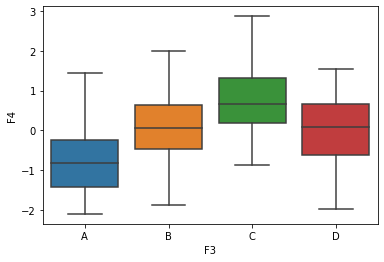

In [103]:
# countinuous feature : F4, F5, F7 시각화
sns.boxplot(x = 'F3', y = 'F4', data = df_sc);

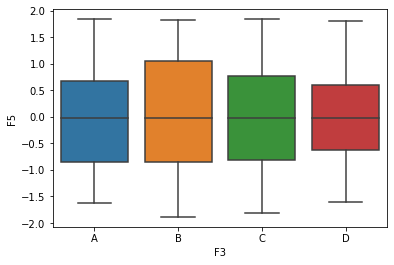

In [104]:
sns.boxplot(x = 'F3', y = 'F5', data = df_sc);

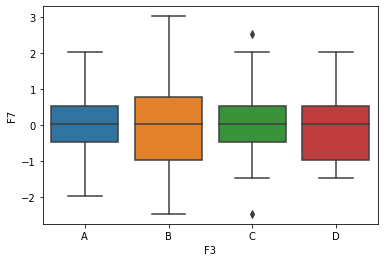

In [105]:
sns.boxplot(x = 'F3', y = 'F7', data = df_sc);

In [106]:
df_sc_A = df_sc[df_sc['F3'] == 'A'] 
df_sc_B = df_sc[df_sc['F3'] == 'B']
df_sc_C = df_sc[df_sc['F3'] == 'C']
df_sc_D = df_sc[df_sc['F3'] == 'D']

import scipy.stats as st
# F3, F4 t-test
print('F3, F4 t-test')
print('p-value =', round(st.ttest_ind(df_sc_A['F4'], df_sc_B['F4'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_C['F4'], df_sc_D['F4'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_B['F4'], df_sc_C['F4'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_A['F4'], df_sc_D['F4'])[1], 4))

# F3, F5 t-test
print('F3, F5 t-test')
print('p-value =', round(st.ttest_ind(df_sc_A['F5'], df_sc_B['F5'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_C['F5'], df_sc_D['F5'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_B['F5'], df_sc_C['F5'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_A['F5'], df_sc_D['F5'])[1], 4))

# F3, F7 t-test
print('F3, F7 t-test')
print('p-value =', round(st.ttest_ind(df_sc_A['F7'], df_sc_B['F7'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_C['F7'], df_sc_D['F7'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_B['F7'], df_sc_C['F7'])[1], 4))
print('p-value =', round(st.ttest_ind(df_sc_A['F7'], df_sc_D['F7'])[1], 4))

F3, F4 t-test
p-value = 0.0
p-value = 0.0001
p-value = 0.0001
p-value = 0.0001
F3, F5 t-test
p-value = 0.7923
p-value = 0.6339
p-value = 0.6862
p-value = 0.7434
F3, F7 t-test
p-value = 0.6287
p-value = 0.9546
p-value = 0.7656
p-value = 0.8771


In [107]:
# F3, F4 ANOVA one-way 테스트
print('F3, F4 ANOVA one-way 테스트')
print('p-value =', round(st.f_oneway(df_sc_A['F4'], df_sc_B['F4'], df_sc_C['F4'], df_sc_D['F4'])[1], 5))    # 가장 유의미한 feature
# F3, F5 ANOVA one-way 테스트
print('F3, F5 ANOVA one-way 테스트')
print('p-value =', round(st.f_oneway(df_sc_A['F5'], df_sc_B['F5'], df_sc_C['F5'], df_sc_D['F5'])[1], 5))
# F3, F7 ANOVA one-way 테스트
print('F3, F7 ANOVA one-way 테스트')
print('p-value =', round(st.f_oneway(df_sc_A['F7'], df_sc_B['F7'], df_sc_C['F7'], df_sc_D['F7'])[1], 5))    # 가장 무의미한 feature

F3, F4 ANOVA one-way 테스트
p-value = 0.0
F3, F5 ANOVA one-way 테스트
p-value = 0.96082
F3, F7 ANOVA one-way 테스트
p-value = 0.96403


In [108]:
# 박스 플롯 그래프만 조금 차이 나고 나머진 다 똑같음.

In [109]:
df_sc2 = pd.get_dummies(df[['F1', 'F2', 'F6', 'F8', 'F9']])
df_sc2['F3'] = df['F3']
df_sc2

,F1_D,F1_N,F2_N,F2_Y,F6_B,F6_C,F6_D,F6_E,F6_F,F6_G,F6_H,F8_X,F8_Y,F8_Z,F9_N,F9_Y,F3
0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,A
1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,A
2,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,A
3,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,A
4,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,D
196,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,D
197,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,D
198,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,D


In [110]:
chi2_contingency(pd.crosstab(df_sc2['F1_D'], df_sc2['F3'], margins_name = 'sum', margins = sum))

(1.7069799001355672,
 0.9887156155909527,
 8,
 array([[ 40.02094241,  38.38743455,  38.38743455,  39.20418848,
         156.        ],
        [  8.97905759,   8.61256545,   8.61256545,   8.79581152,
          35.        ],
        [ 49.        ,  47.        ,  47.        ,  48.        ,
         191.        ]]))

In [111]:
for i in [i for i in df_sc2][:-1]:
  print('{}, F3 카이제곱 테스트 p-value = {}'.format(i, round(chi2_contingency(pd.crosstab(df_sc2[i], df_sc2['F3'], margins_name = 'sum', margins = sum))[1], 3)))

F1_D, F3 카이제곱 테스트 p-value = 0.989
F1_N, F3 카이제곱 테스트 p-value = 0.989
F2_N, F3 카이제곱 테스트 p-value = 0.939
F2_Y, F3 카이제곱 테스트 p-value = 0.939
F6_B, F3 카이제곱 테스트 p-value = 0.929
F6_C, F3 카이제곱 테스트 p-value = 1.0
F6_D, F3 카이제곱 테스트 p-value = 1.0
F6_E, F3 카이제곱 테스트 p-value = 1.0
F6_F, F3 카이제곱 테스트 p-value = 0.495
F6_G, F3 카이제곱 테스트 p-value = 0.995
F6_H, F3 카이제곱 테스트 p-value = 0.791
F8_X, F3 카이제곱 테스트 p-value = 0.754
F8_Y, F3 카이제곱 테스트 p-value = 0.95
F8_Z, F3 카이제곱 테스트 p-value = 1.0
F9_N, F3 카이제곱 테스트 p-value = 1.0
F9_Y, F3 카이제곱 테스트 p-value = 1.0


In [112]:
print('F1, F3 카이제곱 테스트 p-value =', round(chi_1[1], 3))
print('F2, F3 카이제곱 테스트 p-value =', round(chi_2[1], 3))
print('F6, F3 카이제곱 테스트 p-value =', round(chi_6[1], 3))
print('F8, F3 카이제곱 테스트 p-value =', round(chi_8[1], 3))
print('F9, F3 카이제곱 테스트 p-value =', round(chi_9[1], 3))

# F6, F8은 pvalue가 조금 차이남 다른 값들은 차이가 없다.

F1, F3 카이제곱 테스트 p-value = 0.989
F2, F3 카이제곱 테스트 p-value = 0.939
F6, F3 카이제곱 테스트 p-value = 0.985
F8, F3 카이제곱 테스트 p-value = 0.944
F9, F3 카이제곱 테스트 p-value = 1.0
